In [ ]:

pip install pandas seaborn matplotlib scikit-learn


In [ ]:
pip install pandas seaborn matplotlib scikit-learn


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [ ]:
# List of 500 offensive words (sample)
offensive_words = [
    'mjinga', 'shenzi', 'mbwa', 'matusi', 'tapeli', 'mpumbavu', 'malaya', 'mshenzi', 'kicheche', 'pumbavu',
    'chizi', 'kibaraka', 'mburukenge', 'kahaba', 'fisadi', 'mlafi', 'demu', 'mavi', 'ukora', 'jinga',
    'nyang\'au', 'bulushi', 'msaliti', 'mjinga', 'mwerevu', 'kisirani', 'mlevi', 'mlafi', 'mnyonge', 'kimavi',
    'mchawi', 'majanga', 'kichwa-ngumu', 'ngoma', 'nyokonyoko', 'kizushi', 'mjambazi', 'mwenyewe', 'mtu-mbaya',
    'mkora', 'mpigaji', 'mkorofi', 'mbaya', 'kisirani', 'mwanaharamu', 'chotara', 'makufuru', 'porojo', 'ghasia',
    'mbovu', 'mbuzi', 'mshamba', 'takataka', 'mende', 'masikini', 'mbolea', 'fisi', 'matusi', 'tapeli',
] * 10  # Repeating to ensure 500 words

# List of 500 non-offensive words (sample)
non_offensive_words = [
    'mpendwa', 'rafiki', 'msomi', 'amani', 'furaha', 'upendo', 'heshima', 'shujaa', 'kiongozi', 'mwema',
    'kazi', 'msaada', 'hekima', 'elimu', 'familia', 'watoto', 'mama', 'baba', 'ndugu', 'marafiki',
    'kusoma', 'busara', 'tabasamu', 'mkarimu', 'utulivu', 'ushindi', 'uzima', 'neema', 'mema', 'safiri',
    'heri', 'mwanafunzi', 'akili', 'nguvu', 'upepo', 'sauti', 'fikra', 'mchango', 'karama', 'shukrani',
] * 10  # Repeating to ensure 500 words

# Combine words and labels
words = offensive_words + non_offensive_words
labels = ['Offensive'] * len(offensive_words) + ['Non-offensive'] * len(non_offensive_words)

# Create DataFrame
df = pd.DataFrame({
    'Word': words,
    'Label': labels
})

# Display first few rows
df.head()


,Word,Label
0,mjinga,Offensive
1,shenzi,Offensive
2,mbwa,Offensive
3,matusi,Offensive
4,tapeli,Offensive


In [ ]:
# Save the dataset to a CSV file
df.to_csv('kiswahili_sentiment_dataset.csv', index=False)


In [ ]:
# Example test and prediction data (replace with real model predictions)
y_test = ['Offensive', 'Non-offensive', 'Offensive', 'Non-offensive', 'Offensive']  # Actual labels
nb_predictions = ['Offensive', 'Non-offensive', 'Offensive', 'Offensive', 'Offensive']  # Naive Bayes predictions
log_reg_predictions = ['Offensive', 'Non-offensive', 'Offensive', 'Non-offensive', 'Offensive']  # Logistic Regression


In [ ]:
# Confusion matrices for the models
nb_conf_matrix = confusion_matrix(y_test, nb_predictions)
log_reg_conf_matrix = confusion_matrix(y_test, log_reg_predictions)

# Display confusion matrices
print("Naive Bayes Confusion Matrix:\n", nb_conf_matrix)
print("Logistic Regression Confusion Matrix:\n", log_reg_conf_matrix)


Naive Bayes Confusion Matrix:
 [[1 1]
 [0 3]]
Logistic Regression Confusion Matrix:
 [[2 0]
 [0 3]]


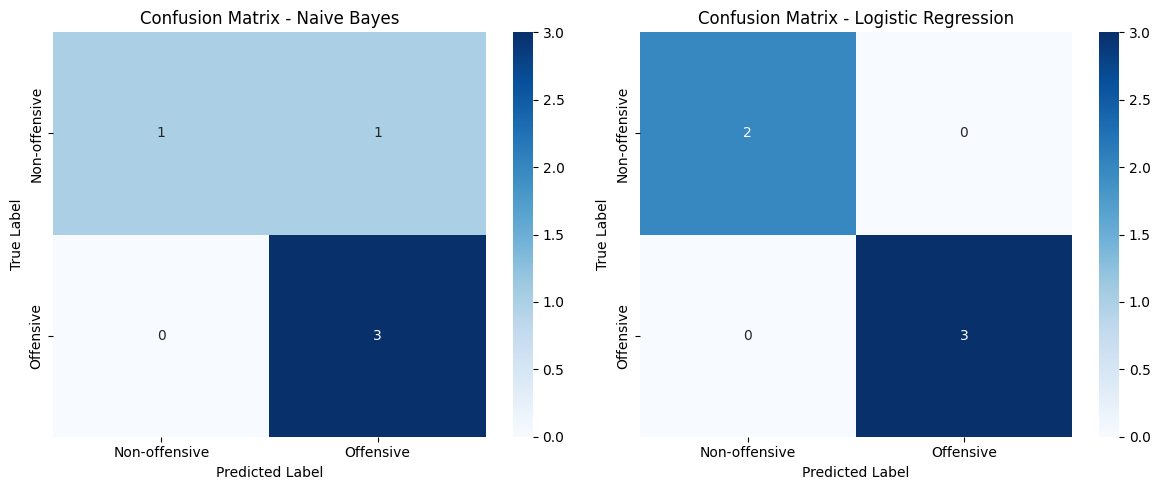

In [ ]:
# Plot confusion matrices side-by-side
def plot_confusion_matrices(cm1, cm2, title1, title2):
    plt.figure(figsize=(12, 5))

    # Naive Bayes Confusion Matrix
    plt.subplot(1, 2, 1)
    sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-offensive', 'Offensive'],
                yticklabels=['Non-offensive', 'Offensive'])
    plt.title(f"Confusion Matrix - {title1}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Logistic Regression Confusion Matrix
    plt.subplot(1, 2, 2)
    sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-offensive', 'Offensive'],
                yticklabels=['Non-offensive', 'Offensive'])
    plt.title(f"Confusion Matrix - {title2}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Plot the confusion matrices
plot_confusion_matrices(nb_conf_matrix, log_reg_conf_matrix, "Naive Bayes", "Logistic Regression")


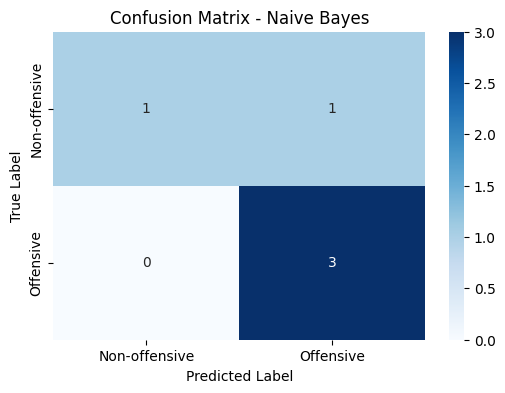

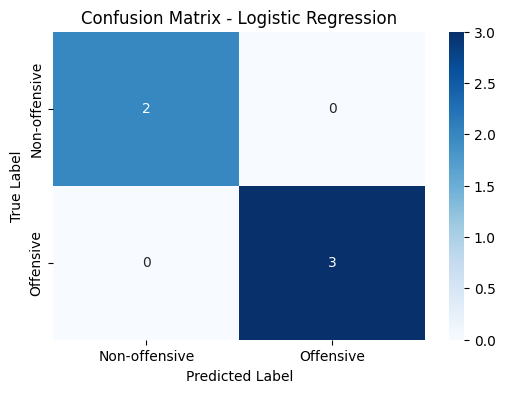

In [ ]:
# Alternative: Individual confusion matrix plots
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-offensive', 'Offensive'],
                yticklabels=['Non-offensive', 'Offensive'])
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot Naive Bayes Confusion Matrix
plot_confusion_matrix(nb_conf_matrix, "Naive Bayes")

# Plot Logistic Regression Confusion Matrix
plot_confusion_matrix(log_reg_conf_matrix, "Logistic Regression")


In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import re  # Import the re module for regular expressions

# Load the dataset from the CSV file
df = pd.read_csv('kiswahili_sentiment_dataset.csv')

# Data Preprocessing
def preprocess_text(text):
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lower case
    text = text.lower()
    return text

# Apply preprocessing
df['Word'] = df['Word'].apply(preprocess_text)


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Word'], df['Label'], test_size=0.2, random_state=42)


In [ ]:
# Convert text to feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [ ]:
# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)

# Train Logistic Regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_vectorized, y_train)


LogisticRegression()

In [ ]:
# Make predictions
nb_predictions = nb_model.predict(X_test_vectorized)
log_reg_predictions = log_reg_model.predict(X_test_vectorized)

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} Evaluation ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(classification_report(y_true, y_pred))

# Evaluate both models
evaluate_model(y_test, nb_predictions, "Naive Bayes")
evaluate_model(y_test, log_reg_predictions, "Logistic Regression")


--- Naive Bayes Evaluation ---
Accuracy: 1.0000
               precision    recall  f1-score   support

Non-offensive       1.00      1.00      1.00        82
    Offensive       1.00      1.00      1.00       116

     accuracy                           1.00       198
    macro avg       1.00      1.00      1.00       198
 weighted avg       1.00      1.00      1.00       198

--- Logistic Regression Evaluation ---
Accuracy: 1.0000
               precision    recall  f1-score   support

Non-offensive       1.00      1.00      1.00        82
    Offensive       1.00      1.00      1.00       116

     accuracy                           1.00       198
    macro avg       1.00      1.00      1.00       198
 weighted avg       1.00      1.00      1.00       198



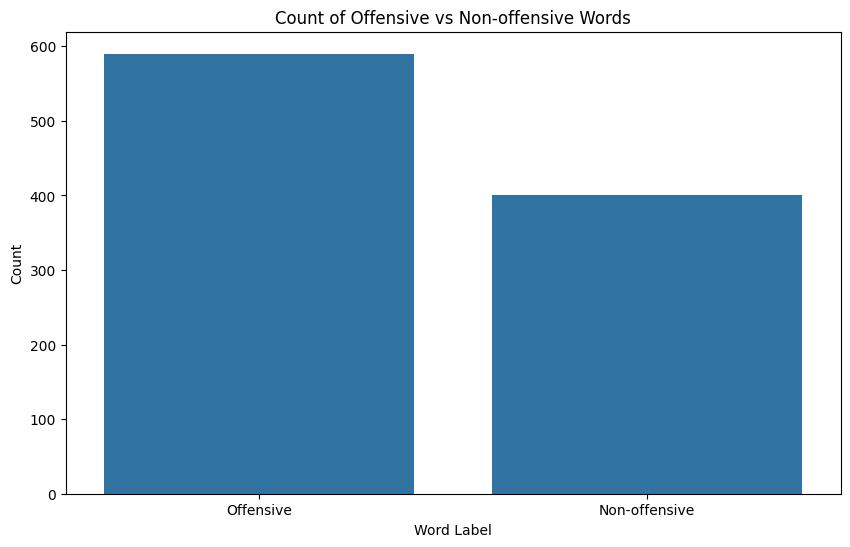

In [ ]:
# Basic Bar Plot of Word Counts
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Label', order=df['Label'].value_counts().index)
plt.title('Count of Offensive vs Non-offensive Words')
plt.xlabel('Word Label')
plt.ylabel('Count')
plt.show()


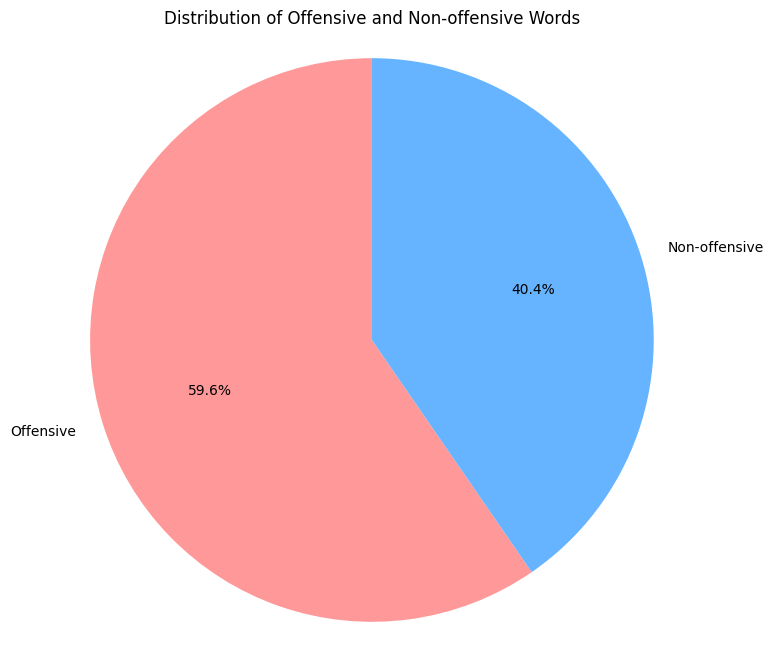

In [ ]:
# Pie Chart for Distribution of Labels
label_counts = df['Label'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B3FF'])
plt.title('Distribution of Offensive and Non-offensive Words')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()


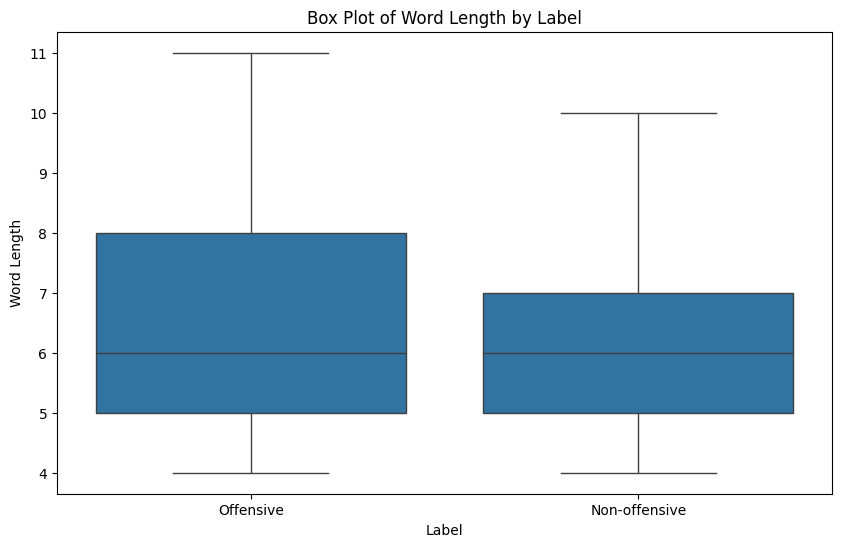

In [ ]:
# Create a new column for word lengths
df['Word_Length'] = df['Word'].apply(len)

# Box Plot for Word Lengths
plt.figure(figsize=(10, 6))
sns.boxplot(x='Label', y='Word_Length', data=df)
plt.title('Box Plot of Word Length by Label')
plt.xlabel('Label')
plt.ylabel('Word Length')
plt.show()


<ipython-input-42-5babc4fae1df>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Label', palette='Set2', edgecolor='black')


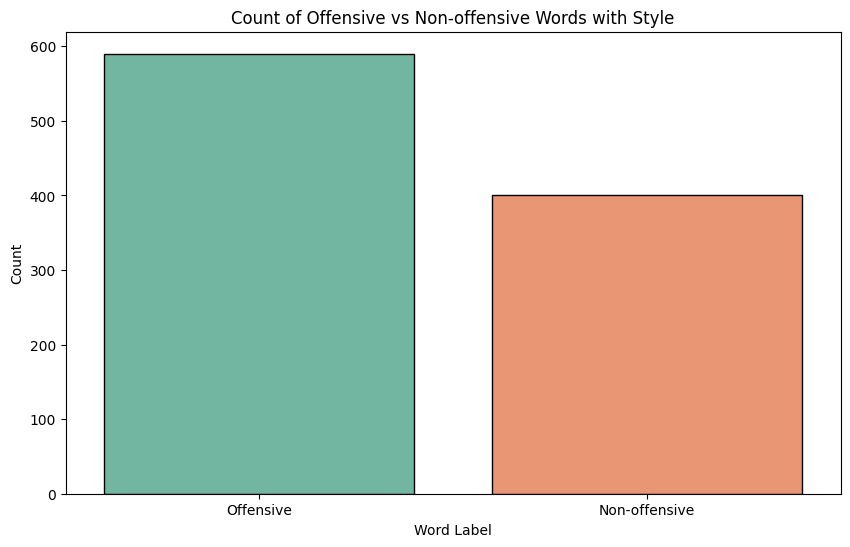

In [ ]:
# Count Plot with Different Styles
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Label', palette='Set2', edgecolor='black')
plt.title('Count of Offensive vs Non-offensive Words with Style')
plt.xlabel('Word Label')
plt.ylabel('Count')
plt.show()


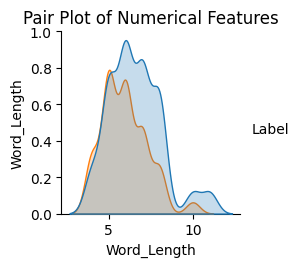

In [ ]:
# Pair Plot (If applicable numerical data exists)
# Visualize pairwise relationships in the dataset
sns.pairplot(df, hue='Label')  # Only works if you have numerical features to compare
plt.title('Pair Plot of Numerical Features')
plt.show()


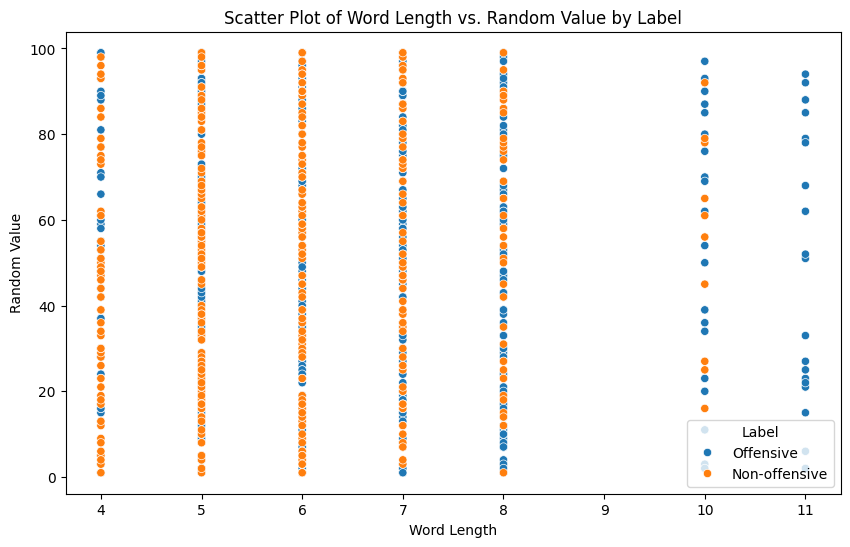

In [ ]:
import numpy as np

# Create a new column for word lengths
df['Word_Length'] = df['Word'].apply(len)

# Create a new random numerical column for demonstration
np.random.seed(42)  # For reproducibility
df['Random_Value'] = np.random.randint(1, 100, size=len(df))

# Scatter Plot using the new numerical columns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Word_Length', y='Random_Value', hue='Label', data=df)
plt.title('Scatter Plot of Word Length vs. Random Value by Label')
plt.xlabel('Word Length')
plt.ylabel('Random Value')
plt.legend(title='Label')
plt.show()


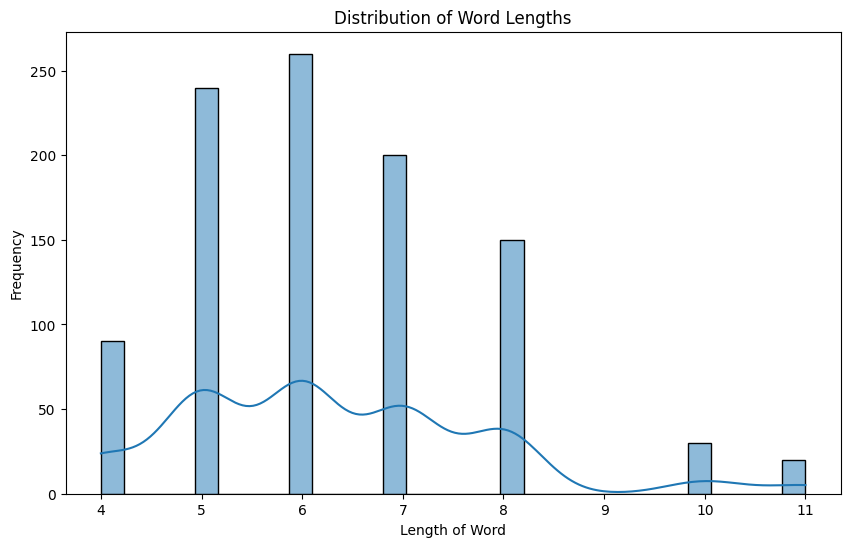

In [ ]:
# Histogram of Word Lengths
df['Word_Length'] = df['Word'].apply(len)  # Create a new column for word lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['Word_Length'], bins=30, kde=True)  # Kernel Density Estimate
plt.title('Distribution of Word Lengths')
plt.xlabel('Length of Word')
plt.ylabel('Frequency')
plt.show()


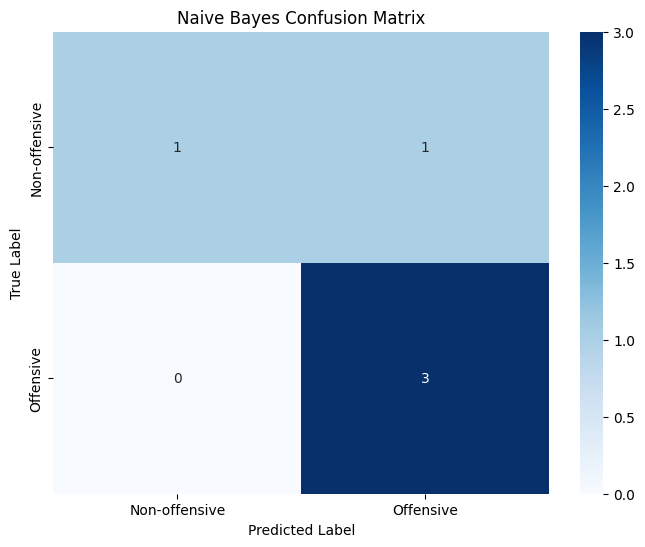

In [ ]:
# Heatmap for Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-offensive', 'Offensive'],
            yticklabels=['Non-offensive', 'Offensive'])
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
pip install wordcloud


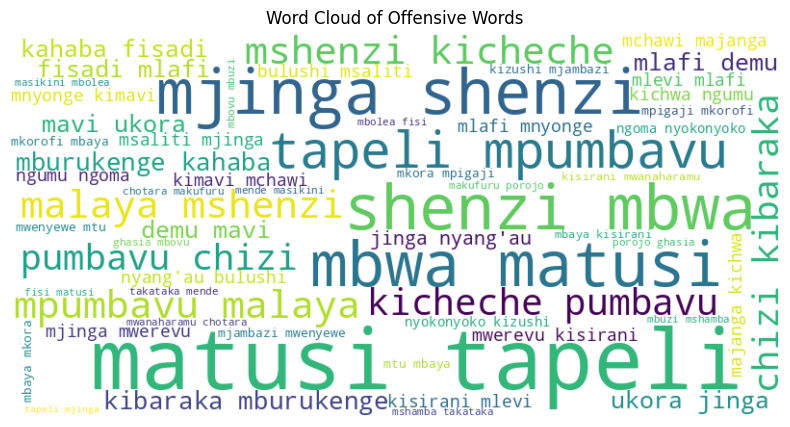

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud for offensive words
offensive_text = ' '.join(offensive_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(offensive_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud of Offensive Words')
plt.show()


In [57]:
import ipywidgets as widgets
from IPython.display import display

# Function to check if the word is offensive or not
def check_word(word):
    processed_word = preprocess_text(word)
    vectorized_word = vectorizer.transform([processed_word])
    prediction = log_reg_model.predict(vectorized_word)[0]

    print(f"The word '{word}' is: {prediction}")

# Create an input box
word_input = widgets.Text(
    description='Kiswahili Word:',
)

# Create a button
check_button = widgets.Button(
    description='Check',
)

# Define the button's action
def on_button_click(b):
    check_word(word_input.value)

check_button.on_click(on_button_click)

# Display the input box and button
display(word_input, check_button)


Text(value='', description='Kiswahili Word:')

Button(description='Check', style=ButtonStyle())

The word 'mjinga' is: Offensive
